Here we'll make a function to calculate distance between two points

In [13]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as ss

#function of distance between two points
def distance(p1,p2):
    """find the distance between two points"""
    return np.sqrt(np.sum(np.power(p2-p1,2)))

We'll take the list and then convert it into a dictionary where frequency of the numbers will be counted and then picking up the max occuring number from the dictionary using item function of the dictionary. I've used random funciton since if there can bemultiple numbers having same frequency then it would pick up only one number from it.

In [7]:
def majority_votes(votes):
    """It will count the frequency of numbers from the argument (passed as list) and then a dictionary will be 
    created from which the frequent occuring numbers are return as list"""
    vote_counts={}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote]+=1
        else:
            vote_counts[vote]=1
    winners=[]
    max_counts=max(vote_counts.values())
    for key,value in vote_counts.items():
        if value==max_counts:
            winners.append(key)
    return random.choice(winners)

Now, the given point will be compared and distance of this point will be calculated from each neighbouring point. All the distances will be sorted in  and their indexes will be returned in sorted manner.

In [6]:
def find_nearest_neighbours(p,points,k=5):
    """find the K nearest neighbours of point P and return their indices"""
    distances=np.zeros(points.shape[0])   #array of size of points
    for i in range(len(distances)):
        distances[i]=distance(p,points[i])
    ind=np.argsort(distances)
    return ind[0:k]

In [8]:
def knn_predict(p,points,outcomes,k=5):
    ind =find_nearest_neighbours(p,points,k)
    return majority_votes(outcomes[ind])
    

Here we are generating our own set of Points and Outcomes (classes to which every point belongs to) from computer

In [16]:
def generate_synth_data(n=50):   #n can be said as rows
    """Creates two sets of points from bivariate and normal distributions."""
    points=np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))),axis=0)        #n,2 is rows and columns
    outcomes=np.concatenate((np.repeat(0,n),np.repeat(1,n)))
    return (points,outcomes)

We'll plot points generated synthetically and then we can predict the class of any point from the figure generated.

In [20]:
def make_prediction_grid(predictors,outcomes,limits,h,k):
    """Classify each point on the prediction grid."""
    (x_min,x_max,y_min,y_max)=limits
    xs=np.arange(x_min,x_max,h)
    ys=np.arange(y_min,y_max,h) 
    xx,yy = np.meshgrid(xs,ys)
    
    prediction_grid=np.zeros(xx.shape,dtype=int)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p=np.array([x,y])
            prediction_grid[j,i]= knn_predict(p,predictors,outcomes,k)
    
    return (xx,yy,prediction_grid)

In [21]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

Now, we have to generate our points and plot the figure.

In [22]:
(predictors,outcomes)=generate_synth_data()

In [28]:
k=5
filename="knn_predictor.pdf" 
limits=(-3,4,-3,4)
h=0.1

In [29]:
(xx,yy,prediction_grid)=make_prediction_grid(predictors,outcomes,limits,h,k)

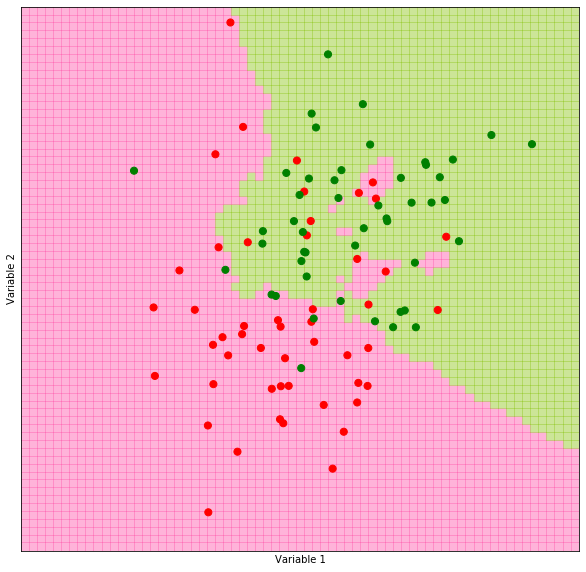

In [30]:
plot_prediction_grid(xx,yy,prediction_grid,filename)

So, from the above figure you can manipulate the inputs accordingly and then you can see the change in smoothnes of class of different colors. This figure will be saved in your current working directory in ".pdf" format which can be used to compared smoothness of classes at various inputs in functions.